## load URI ED cohort

In [155]:
import pandas as pd
#pip install pyarrow

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
uri_ed = pd.read_feather("/home/michelle/T-Drive/PCHPAsthma/Sandra Internship/URI_geocoded.feather")

## pull sdoh features from detailed tables using census data api

- population: B01003_001E, total population
- household: __?__ B07013_001E
- median income: B06011_001E, median income in the past 12 months
- median gross rent: B25063_025E
- median home value: __?__

household composition
- single parents household: B09005_004E, B09005_005E, in male/female householder, no spouse/partner present household
- total: B09005_001E, total, household type for children under 18 years in households
- childcare need: B09002_009E, B09002_016E, in other families, male/female householder, no spouse present, under 3 years
- total: B09002_001E, total, own children under 18 years by family type and age
- household size: 1,2,3,4+, __question__: where to find it?
- total: B11016_001E, total, household type by household size

education
- high school graduate: B06009_003E
- college or associate degree: B06009_004E
- bachelor degree: B06009_005E
- total: B06009_001E, total, place of birth by education attainment in the US

reliance on public transportation
- car, drove along or carpooled: B08006_002E
- public transportation: B08006_008E
- public transportation - bus: B08006_009E
- total: B08006_001E, total, sex of workers by means of transportation to work
- car, drove along: B08122_005E
- car, carpooled: B08122_009E
- public transportation: B08122_013E
- total: B08122_001E, total, means of transportatiOn to work by poverty status in the past 12 months
- no vehicle: B08014_002E
- total: B08014_001E, total, sex of workers by vehicles available
- car, drove along: B08101_009E
- car, carpooled: B08101_017E
- public transportation: B08101_025E
- total: B08101_001E, total, means of transportation to work by age
- aggregated travel time to work (in minutes) of workers by sex: B08013_001E
- aggregated number of vehicles (car, truck, or van) used in commuting by workers >=16y: B08015_001E

food insecurity
- SNAP household: B09019_002E
- total: B09019_001E, total, receipt of supplemental security income (SSI), cash public assistance income, or food stamps/SNAP in the past 12 months by household type for children under 18y
- others considered: B19123_001E, B22002_001E, B22003_001E

poverty level
- below 100% of poverty level: B06012_002E
- total: B06012_001E, total, PLACE OF BIRTH BY POVERTY STATUS IN THE PAST 12 MONTHS IN THE UNITED STATES

insurance coverage
- no insurance: B992701_003E, no health insurance items allocated
- total: B992701_001E, allocation of health insurance coverage
- employer-based insurance: B992704_001E
- direct-purchase insurance: B992705_001E
- Medicare insurance: B992706_001E
- Medicaid insurance: B992707_001E

employment & paycheck predictability
- unemployment: B23025_007E, not in labor force 
- total: B23025_001E, EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER
- unemployment: B99231_003E, not allocated
- total: B99231_001E, ALLOCATION OF EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER
- no work 16-19y: B23027_006E
- no work 20-24y: B23027_011E
- no work 25-44y: B23027_016E
- no work 45-54y: B23027_021E
- no work 55-64y: B23027_026E
- no work 65-69y: B23027_031E
- no work >=70y: B23027_036E
- total: B23027_001E, FULL-TIME, YEAR-ROUND WORK STATUS IN THE PAST 12 MONTHS BY AGE FOR THE POPULATION 16 YEARS AND OVER
- both parents working: __?__

others resources to consider
- ADI 
- from CDI
- from CVC

In [4]:
# max 50 variables per query
var = ','.join(['B01003_001E',
'B07013_001E',
'B06011_001E',
'B25063_025E',
'B09005_004E', 
'B09005_005E',
'B09005_001E',
'B09002_009E', 
'B09002_016E',
'B09002_001E', 
'B11016_001E', 
'B06009_003E',
'B06009_004E',
'B06009_005E',
'B06009_001E',
'B08006_002E',
'B08006_008E',
'B08006_009E',
'B08006_001E',
'B08122_005E',
'B08122_009E',
'B08122_013E',
'B08122_001E', 
'B08014_002E',
'B08014_001E', 
'B08101_009E',
'B08101_017E',
'B08101_025E',
'B08101_001E',
'B08013_001E',
'B08015_001E',
'B09019_002E',
'B09019_001E', 
'B19123_001E', 
'B22002_001E', 
'B22003_001E',
'B06012_002E',
'B06012_001E',
'B992701_003E',
'B992701_001E',
'B992704_001E',
'B992705_001E',
'B992706_001E', 
'B992707_001E'])

In [11]:
var = ','.join(['B23025_007E', 
'B23025_001E', 
'B99231_003E', 
'B99231_001E',  
'B23027_006E',
'B23027_011E',
'B23027_016E',
'B23027_021E',
'B23027_026E',
'B23027_031E',
'B23027_036E',
'B23027_001E'])

In [12]:
data_set = '2020/acs/acs5'  # /profile # /subject
geography = 'for=tract:*&in=state:48'  # Texas only
apikey = 'd4dfe421923f8c3b79fd7b11784a6e0fdaec1de6'

url = 'https://api.census.gov/data/{}?get={}&{}&key={}'
url.format(data_set, var, geography, apikey)

'https://api.census.gov/data/2020/acs/acs5?get=B23025_007E,B23025_001E,B99231_003E,B99231_001E,B23027_006E,B23027_011E,B23027_016E,B23027_021E,B23027_026E,B23027_031E,B23027_036E,B23027_001E&for=tract:*&in=state:48&key=d4dfe421923f8c3b79fd7b11784a6e0fdaec1de6'

In [13]:
df = pd.read_json(url.format(data_set, var, geography, apikey))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,B23025_007E,B23025_001E,B99231_003E,B99231_001E,B23027_006E,B23027_011E,B23027_016E,B23027_021E,B23027_026E,B23027_031E,B23027_036E,B23027_001E,state,county,tract
1,1594,5684,5074,5684,269,64,157,165,117,29,487,5684,48,029,181004
2,826,3011,2857,3011,102,65,209,105,88,47,183,3011,48,029,181005
3,1935,5067,4749,5067,219,0,196,115,271,130,795,5067,48,029,181100
4,1746,4792,4525,4792,44,65,220,120,134,176,574,4792,48,029,181200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,735,2930,2604,2930,23,39,124,44,111,132,211,2930,48,453,002409
6893,719,3318,3120,3318,50,6,200,65,123,53,204,3318,48,453,002410
6894,1544,4838,3950,4838,398,114,354,250,103,44,391,4838,48,453,002411
6895,1254,4116,3625,4116,259,114,223,109,242,111,312,4116,48,453,002412


In [14]:
df.columns = df.iloc[0,:]  # first row as column names
df = df.iloc[1:]  # remove first row
df

,B23025_007E,B23025_001E,B99231_003E,B99231_001E,B23027_006E,B23027_011E,B23027_016E,B23027_021E,B23027_026E,B23027_031E,B23027_036E,B23027_001E,state,county,tract
1,1594,5684,5074,5684,269,64,157,165,117,29,487,5684,48,029,181004
2,826,3011,2857,3011,102,65,209,105,88,47,183,3011,48,029,181005
3,1935,5067,4749,5067,219,0,196,115,271,130,795,5067,48,029,181100
4,1746,4792,4525,4792,44,65,220,120,134,176,574,4792,48,029,181200
5,977,4064,3883,4064,99,0,383,26,175,12,209,4064,48,029,181301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,735,2930,2604,2930,23,39,124,44,111,132,211,2930,48,453,002409
6893,719,3318,3120,3318,50,6,200,65,123,53,204,3318,48,453,002410
6894,1544,4838,3950,4838,398,114,354,250,103,44,391,4838,48,453,002411
6895,1254,4116,3625,4116,259,114,223,109,242,111,312,4116,48,453,002412


In [9]:
sdoh1 = df  # first 43 sdoh features + 3 geographical indicators, in first API call

In [10]:
sdoh1.shape

(6896, 47)

In [15]:
sdoh2 = df  # last 12 sdoh features + 3 geographical indicators, in second API call

In [16]:
sdoh2.shape

(6896, 15)

In [17]:
sdoh1.keys()

Index(['B01003_001E', 'B07013_001E', 'B06011_001E', 'B25063_025E',
       'B09005_004E', 'B09005_005E', 'B09005_001E', 'B09002_009E',
       'B09002_016E', 'B09002_001E', 'B11016_001E', 'B06009_003E',
       'B06009_004E', 'B06009_005E', 'B06009_001E', 'B08006_002E',
       'B08006_008E', 'B08006_009E', 'B08006_001E', 'B08122_005E',
       'B08122_009E', 'B08122_013E', 'B08122_001E', 'B08014_002E',
       'B08014_001E', 'B08101_009E', 'B08101_017E', 'B08101_025E',
       'B08101_001E', 'B08013_001E', 'B08015_001E', 'B09019_002E',
       'B09019_001E', 'B19123_001E', 'B22002_001E', 'B22003_001E',
       'B06012_002E', 'B06012_001E', 'B992701_003E', 'B992701_001E',
       'B992704_001E', 'B992705_001E', 'B992706_001E', 'B992707_001E', 'state',
       'county', 'tract'],
      dtype='object', name=0)

In [18]:
sdoh2.keys()

Index(['B23025_007E', 'B23025_001E', 'B99231_003E', 'B99231_001E',
       'B23027_006E', 'B23027_011E', 'B23027_016E', 'B23027_021E',
       'B23027_026E', 'B23027_031E', 'B23027_036E', 'B23027_001E', 'state',
       'county', 'tract'],
      dtype='object', name=0)

In [19]:
sdoh1.to_csv("URI_ED_sdoh1.csv", index=False)
sdoh2.to_csv("URI_ED_sdoh2.csv", index=False)

In [26]:
sdoh1=pd.read_csv('/home/michelle/XiaoWang/PCHP/URI_ED_sdoh1.csv')
sdoh2=pd.read_csv('/home/michelle/XiaoWang/PCHP/URI_ED_sdoh2.csv')

<AxesSubplot:>

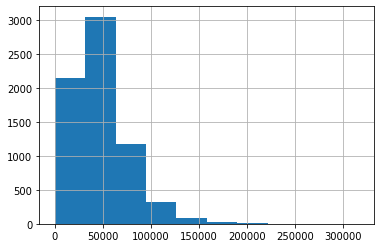

In [334]:
#sdoh1=sdoh1.iloc[:,1:]
#sdoh2=sdoh2.iloc[:,1:]
sdoh2.head(5)

mask=sdoh1['B08013_001E'].astype('float')>-1000
sdoh1['B08013_001E'].astype('float').loc[mask].hist()
# in minutes
# aggregated working time in one year? how long?
# for all workers in that geography?

<AxesSubplot:>

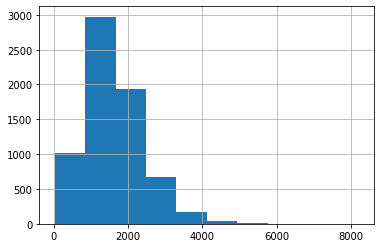

In [333]:
mask=sdoh1['B08015_001E'].astype('float')>-1000
sdoh1['B08015_001E'].astype('float').loc[mask].hist()
# aggregated number of vehicles in that geography for all residents?

## merge sdoh with ADI and URI ED cohort

In [20]:
cols = ['state','county','tract']
sdoh1["Tract"] = sdoh1[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
sdoh2["Tract"] = sdoh2[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
sdoh1.head(5)

/tmp/ipykernel_763108/3284198169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdoh1["Tract"] = sdoh1[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
/tmp/ipykernel_763108/3284198169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdoh2["Tract"] = sdoh2[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)


,B01003_001E,B07013_001E,B06011_001E,B25063_025E,B09005_004E,B09005_005E,B09005_001E,B09002_009E,B09002_016E,B09002_001E,...,B992701_003E,B992701_001E,B992704_001E,B992705_001E,B992706_001E,B992707_001E,state,county,tract,Tract
1,6669,6475,26283,0,222,354,1294,264,82,1235,...,5528,6565,6565,6565,6565,6565,48,029,181004,48029181004
2,4000,3981,23685,0,0,479,1061,0,132,1037,...,3555,3974,3974,3974,3974,3974,48,029,181005,48029181005
3,6152,6101,34731,0,44,467,1329,44,0,1245,...,5266,6152,6152,6152,6152,6152,48,029,181100,48029181100
4,5350,5337,33692,0,0,237,653,0,0,539,...,4682,5341,5341,5341,5341,5341,48,029,181200,48029181200
5,4894,4767,34751,0,0,456,902,33,114,887,...,4235,4894,4894,4894,4894,4894,48,029,181301,48029181301


In [21]:
cols = ['state','county','tract','Tract']
sdoh = pd.merge(sdoh1, sdoh2, how = "outer", left_on = cols, right_on = cols)
sdoh.head(5)

,B01003_001E,B07013_001E,B06011_001E,B25063_025E,B09005_004E,B09005_005E,B09005_001E,B09002_009E,B09002_016E,B09002_001E,...,B99231_003E,B99231_001E,B23027_006E,B23027_011E,B23027_016E,B23027_021E,B23027_026E,B23027_031E,B23027_036E,B23027_001E
0,6669,6475,26283,0,222,354,1294,264,82,1235,...,5074,5684,269,64,157,165,117,29,487,5684
1,4000,3981,23685,0,0,479,1061,0,132,1037,...,2857,3011,102,65,209,105,88,47,183,3011
2,6152,6101,34731,0,44,467,1329,44,0,1245,...,4749,5067,219,0,196,115,271,130,795,5067
3,5350,5337,33692,0,0,237,653,0,0,539,...,4525,4792,44,65,220,120,134,176,574,4792
4,4894,4767,34751,0,0,456,902,33,114,887,...,3883,4064,99,0,383,26,175,12,209,4064


In [1]:
temp = pd.merge(uri_ed, sdoh, how = "left", left_on = "Tract", right_on = "Tract")
temp.head(5)

In [166]:
temp[['BlockGroup','Tract']].dtypes

BlockGroup    object
Tract         object
dtype: object

In [168]:
adi = pd.read_csv("/home/michelle/T-Drive/PCHPAsthma/Sandra Internship/ADI_TX_blockgroup_2015.txt")
adi.head(5)

,gisjoin,fips,adi_natrank,adi_staternk
0,G48000109501001,480019501001,72,6
1,G48000109501002,480019501002,64,5
2,G48000109501003,480019501003,66,6
3,G48000109505001,480019505001,72,6
4,G48000109505002,480019505002,95,10


In [169]:
# seperate adi into numerical and text columns
adi=adi.join(adi.pop('adi_natrank').str.extract('(?P<adinatnumbers>\d+)?(?P<adinattext>\D+)?'))  # .fillna('')
adi=adi.join(adi.pop('adi_staternk').str.extract('(?P<adistnumbers>\d+)?(?P<adisttext>\D+)?'))
adi.head(5)

,gisjoin,fips,adinatnumbers,adinattext,adistnumbers,adisttext
0,G48000109501001,480019501001,72,NaN,6,NaN
1,G48000109501002,480019501002,64,NaN,5,NaN
2,G48000109501003,480019501003,66,NaN,6,NaN
3,G48000109505001,480019505001,72,NaN,6,NaN
4,G48000109505002,480019505002,95,NaN,10,NaN


In [170]:
adi.keys()
adi.dtypes

gisjoin          object
fips              int64
adinatnumbers    object
adinattext       object
adistnumbers     object
adisttext        object
dtype: object

In [171]:
adi['fips'] = adi['fips'].astype('str')

In [2]:
temp = pd.merge(temp, adi, how = "left", left_on = "BlockGroup", right_on = "fips")
temp.head(5)

In [173]:
temp.keys()

Index(['MEMBER_ID', 'n_URI_ED_visits_5yr', 'Address', 'City', 'State',
       'ZipCode', 'Latitude', 'Longitude', 'BlockGroup', 'Tract',
       'B01003_001E', 'B07013_001E', 'B06011_001E', 'B25063_025E',
       'B09005_004E', 'B09005_005E', 'B09005_001E', 'B09002_009E',
       'B09002_016E', 'B09002_001E', 'B11016_001E', 'B06009_003E',
       'B06009_004E', 'B06009_005E', 'B06009_001E', 'B08006_002E',
       'B08006_008E', 'B08006_009E', 'B08006_001E', 'B08122_005E',
       'B08122_009E', 'B08122_013E', 'B08122_001E', 'B08014_002E',
       'B08014_001E', 'B08101_009E', 'B08101_017E', 'B08101_025E',
       'B08101_001E', 'B08013_001E', 'B08015_001E', 'B09019_002E',
       'B09019_001E', 'B19123_001E', 'B22002_001E', 'B22003_001E',
       'B06012_002E', 'B06012_001E', 'B992701_003E', 'B992701_001E',
       'B992704_001E', 'B992705_001E', 'B992706_001E', 'B992707_001E', 'state',
       'county', 'tract', 'B23025_007E', 'B23025_001E', 'B99231_003E',
       'B99231_001E', 'B23027_006E', 'B2

In [174]:
temp.shape

(182794, 75)

## load CDI data and merge with cohort

Look at existing CVC data for 5 components and overall index.
- household essentials (HE), 
- enpowered people (EP), 
- equitable communities (EC), 
- good health (GH), 
- access to vital services (VS) - not available yet

In [156]:
he = pd.read_csv("/home/michelle/T-Drive/CDI/Collateral/Household_Essentials/heindex_collateral_10212020.csv")
#he2 = pd.read_csv("/home/michelle/T-Drive/CDI/Collateral/Household_Essentials/heindex_logit_10072020.csv")
#he3 = pd.read_csv("/home/michelle/T-Drive/CDI/Collateral/Household_Essentials/heindex_collateral_10052020.csv")
#he4 = pd.read_csv("/home/michelle/T-Drive/CDI/Collateral/Household_Essentials/heindex_collateral_10122020.csv")
he.head(5)  # _n means normalized

,Unnamed: 0,blockgroup,total_households,snap,male_singleparent,female_singleparent,total_households_children,total_singleparent,health_uninsured,total_noninstitutionalizedpop,health_insured,median_income,total_pop...16.,fulltime_yrround...16.,total_population,total_males,total_females,total_males..16.,total_females..16.,total_population..16.,total_households_new,fulltime_yrround...16._new,total_households_children_new,total_noninstitutionalizedpop_new,median_income_new,foodinsecurity,paypred,singleparent,uninsured,foodinsecurity_n,paypred_n,singleparent_n,uninsured_n,median_income_new_n,heindex_sqrt,heindex_sqrt_n,heindex_sqrt_quin,heindex_sqrt_quincat
0,1,481130137141,725,33,0,15,330,15,421,1822,1401,69188.00000,1494,720,1822,950,872,805,714,1519,725,720.00000,330.00000,1822,69188.00000,0.04552,0.48193,0.04545,0.23106,0.05522,0.44789,0.04545,0.30180,0.74776,0.48888,0.55369,"(0.476,0.606]",Quintile 2
1,2,481130137144,476,14,0,138,778,138,809,2070,1261,56154.00000,1426,639,2070,1024,1046,672,760,1432,476,639.00000,778.00000,2070,56154.00000,0.02941,0.44811,0.17738,0.39082,0.03568,0.48826,0.17738,0.51046,0.80251,0.56859,0.64396,"(0.606,0.682]",Quintile 3
2,3,481130122041,308,0,0,0,59,0,0,663,663,89135.00000,566,303,663,347,316,288,278,566,308,303.00000,59.00000,663,89135.00000,0.00000,0.53534,0.00000,0.00000,0.00000,0.38414,0.00000,0.00000,0.66398,0.37308,0.42253,"[0,0.476]",Quintile 1
3,4,481130137131,221,21,0,146,303,146,376,833,457,36688.00000,610,246,914,469,445,337,303,640,221,246.00000,303.00000,833,36688.00000,0.09502,0.40328,0.48185,0.45138,0.11528,0.54178,0.48185,0.58956,0.88427,0.67976,0.76986,"(0.754,1]",Quintile 5
4,5,481130170012,393,144,0,98,154,98,105,941,836,31392.00000,2588,580,2864,2316,548,2213,375,2588,393,580.00000,154.00000,941,31392.00000,0.36641,0.22411,0.63636,0.11158,0.44454,0.75565,0.63636,0.14574,0.90651,0.72370,0.81963,"(0.754,1]",Quintile 5


In [153]:
he.keys()

Index(['Unnamed: 0', 'blockgroup', 'total_households', 'snap',
       'male_singleparent', 'female_singleparent', 'total_households_children',
       'total_singleparent', 'health_uninsured',
       'total_noninstitutionalizedpop', 'health_insured', 'median_income',
       'total_pop...16.', 'fulltime_yrround...16.', 'total_population',
       'total_males', 'total_females', 'total_males..16.',
       'total_females..16.', 'total_population..16.', 'total_households_new',
       'fulltime_yrround...16._new', 'total_households_children_new',
       'total_noninstitutionalizedpop_new', 'median_income_new',
       'foodinsecurity', 'paypred', 'singleparent', 'uninsured',
       'foodinsecurity_n', 'paypred_n', 'singleparent_n', 'uninsured_n',
       'median_income_new_n', 'heindex_sqrt', 'heindex_sqrt_n',
       'heindex_sqrt_quin', 'heindex_sqrt_quincat'],
      dtype='object')

In [154]:
ep = pd.read_csv("/home/michelle/T-Drive/CDI/Collateral/Empowered_People/epindex_collateral_11062020.csv")
ep.head(5)

,Unnamed: 0,blockgroup,year,total_edattainment,total_male_edattainment,total_female_edattainment,total_male_ed_at_gt_25,total_female_ed_at_gt_25,total_ed_at_gt_25,total_intpop,...,mobility_o,connectivity_o,education_o_n,literacy_o_n,mobility_o_n,connectivity_o_n,epindex_sqrt_o,epindex_sqrt_o_n,epindex_sqrt_o_quin,epindex_sqrt_o_quincat
0,1,481130137144,2018,1049,505,544,143,182,325,476.00000,...,33.00000,0.20168,0.48037,0.28050,0.59259,0.30326,0.49542,0.47423,"(0.463,0.57]",Quintile 2
1,2,481130122041,2018,566,288,278,28,0,28,308.00000,...,37.00000,0.05195,0.91703,0.84933,0.51852,0.07811,0.73602,0.86414,"(0.761,1]",Quintile 5
2,3,481130137131,2018,496,269,227,57,33,90,221.00000,...,38.00000,NaN,0.69567,0.32127,0.50000,NaN,0.59309,0.63252,"(0.57,0.662]",Quintile 3
3,4,481130170012,2018,2517,2142,375,698,83,781,393.00000,...,NaN,0.57252,0.47958,NaN,NaN,0.86088,0.75960,0.90234,"(0.761,1]",Quintile 5
4,5,481130170013,2018,1656,650,1006,286,383,669,914.00000,...,NaN,0.15098,0.32243,0.32345,NaN,0.22703,0.30678,0.16854,"[0,0.463]",Quintile 1


In [157]:
ep.keys()

Index(['Unnamed: 0', 'blockgroup', 'year', 'total_edattainment',
       'total_male_edattainment', 'total_female_edattainment',
       'total_male_ed_at_gt_25', 'total_female_ed_at_gt_25',
       'total_ed_at_gt_25', 'total_intpop', 'no_internet_pop', 'total_adults',
       'ed_attn_adults', 'lit_p1', 'lit_p1_blkgrp', 'walkscore', 'bikescore',
       'transitscore', 'education', 'literacy', 'mobility', 'connectivity',
       'education_o', 'literacy_o', 'mobility_o', 'connectivity_o',
       'education_o_n', 'literacy_o_n', 'mobility_o_n', 'connectivity_o_n',
       'epindex_sqrt_o', 'epindex_sqrt_o_n', 'epindex_sqrt_o_quin',
       'epindex_sqrt_o_quincat'],
      dtype='object')

In [159]:
ec = pd.read_csv("/home/michelle/T-Drive/CDI/Collateral/Equitable_Communities/ecindex_forpred_12032020.csv")
ec.head(5)

,Unnamed: 0,blockgroup,ecindex_sqrt_n,ecindex_sqrt_quincat
0,1,481130137144,0.18581,Quintile 2
1,2,481130122041,0.29946,Quintile 3
2,3,481130137131,0.28641,Quintile 3
3,4,481130170012,0.24008,Quintile 3
4,5,481130170013,0.24234,Quintile 3


In [160]:
gh = pd.read_csv("/home/michelle/T-Drive/CDI/Collateral/Good_Health/ghindex_forpred_12072020.csv")
gh.head(5)  # max possibly means min-max scaler for normalization

,blockgroup,cd_index_n,db_index_n,gh_index_max_n,gh_index_max_quincat
0,481130137141,0.48083,0.54063,0.54063,Quintile 3
1,481130137144,0.48083,0.54063,0.54063,Quintile 3
2,481130122041,0.47227,0.46266,0.46266,Quintile 2
3,481130137131,0.47194,0.71051,0.71051,Quintile 5
4,481130170012,0.48754,0.61812,0.61812,Quintile 4


In [161]:
oi = pd.read_csv("/home/michelle/T-Drive/CDI/Collateral/Overall_Index/cdiindex_forpred_12072020.csv")
oi.head(5)  # use this one!

,blockgroup,cdi_index_n,cdi_index_n_quincat,heindex_sqrt_n,heindex_sqrt_quincat,epindex_sqrt_n,epindex_sqrt_quincat,ecindex_sqrt_n,ecindex_sqrt_quincat,gh_index_max_n,gh_index_max_quincat
0,481130137144,0.45634,Quintile 3,0.64396,Quintile 3,0.60750,Quintile 4,0.18581,Quintile 2,0.54063,Quintile 3
1,481130122041,0.41217,Quintile 2,0.42253,Quintile 1,0.62568,Quintile 4,0.29946,Quintile 3,0.46266,Quintile 2
2,481130137131,0.69244,Quintile 5,0.76986,Quintile 5,0.83363,Quintile 5,0.28641,Quintile 3,0.71051,Quintile 5
3,481130170012,0.76284,Quintile 5,0.81963,Quintile 5,0.94544,Quintile 5,0.24008,Quintile 3,0.61812,Quintile 4
4,481130170013,0.65914,Quintile 5,0.70145,Quintile 4,0.84301,Quintile 5,0.24234,Quintile 3,0.61812,Quintile 4


In [178]:
#temp.dtypes
oi.dtypes

blockgroup                int64
cdi_index_n             float64
cdi_index_n_quincat      object
heindex_sqrt_n          float64
heindex_sqrt_quincat     object
epindex_sqrt_n          float64
epindex_sqrt_quincat     object
ecindex_sqrt_n          float64
ecindex_sqrt_quincat     object
gh_index_max_n          float64
gh_index_max_quincat     object
dtype: object

In [179]:
oi['blockgroup'] = oi['blockgroup'].astype('str')

In [3]:
temp = pd.merge(temp, oi, how = "left", left_on = "BlockGroup", right_on = "blockgroup")
temp.head(5)

In [182]:
temp.shape

(182794, 86)

In [183]:
temp.keys()

Index(['MEMBER_ID', 'n_URI_ED_visits_5yr', 'Address', 'City', 'State',
       'ZipCode', 'Latitude', 'Longitude', 'BlockGroup', 'Tract',
       'B01003_001E', 'B07013_001E', 'B06011_001E', 'B25063_025E',
       'B09005_004E', 'B09005_005E', 'B09005_001E', 'B09002_009E',
       'B09002_016E', 'B09002_001E', 'B11016_001E', 'B06009_003E',
       'B06009_004E', 'B06009_005E', 'B06009_001E', 'B08006_002E',
       'B08006_008E', 'B08006_009E', 'B08006_001E', 'B08122_005E',
       'B08122_009E', 'B08122_013E', 'B08122_001E', 'B08014_002E',
       'B08014_001E', 'B08101_009E', 'B08101_017E', 'B08101_025E',
       'B08101_001E', 'B08013_001E', 'B08015_001E', 'B09019_002E',
       'B09019_001E', 'B19123_001E', 'B22002_001E', 'B22003_001E',
       'B06012_002E', 'B06012_001E', 'B992701_003E', 'B992701_001E',
       'B992704_001E', 'B992705_001E', 'B992706_001E', 'B992707_001E', 'state',
       'county', 'tract', 'B23025_007E', 'B23025_001E', 'B99231_003E',
       'B99231_001E', 'B23027_006E', 'B2

In [184]:
temp.drop(['Address','City','State','ZipCode','Latitude','Longitude','BlockGroup','Tract','state','county',
           'tract','gisjoin','fips','adinattext','adisttext'], inplace = True, axis = 1)

In [338]:
temp.shape

(182794, 71)

In [186]:
temp.keys()

Index(['MEMBER_ID', 'n_URI_ED_visits_5yr', 'B01003_001E', 'B07013_001E',
       'B06011_001E', 'B25063_025E', 'B09005_004E', 'B09005_005E',
       'B09005_001E', 'B09002_009E', 'B09002_016E', 'B09002_001E',
       'B11016_001E', 'B06009_003E', 'B06009_004E', 'B06009_005E',
       'B06009_001E', 'B08006_002E', 'B08006_008E', 'B08006_009E',
       'B08006_001E', 'B08122_005E', 'B08122_009E', 'B08122_013E',
       'B08122_001E', 'B08014_002E', 'B08014_001E', 'B08101_009E',
       'B08101_017E', 'B08101_025E', 'B08101_001E', 'B08013_001E',
       'B08015_001E', 'B09019_002E', 'B09019_001E', 'B19123_001E',
       'B22002_001E', 'B22003_001E', 'B06012_002E', 'B06012_001E',
       'B992701_003E', 'B992701_001E', 'B992704_001E', 'B992705_001E',
       'B992706_001E', 'B992707_001E', 'B23025_007E', 'B23025_001E',
       'B99231_003E', 'B99231_001E', 'B23027_006E', 'B23027_011E',
       'B23027_016E', 'B23027_021E', 'B23027_026E', 'B23027_031E',
       'B23027_036E', 'B23027_001E', 'adinatnumber

In [187]:
temp.to_csv("uri_data_raw.csv",index=False)

In [364]:
temp=pd.read_csv("/home/michelle/XiaoWang/PCHP/uri_data_raw.csv")

## create meaningful sdoh features

In [365]:
# don't need quintile for CDI indices
df = temp.drop(['blockgroup','cdi_index_n_quincat','heindex_sqrt_quincat','epindex_sqrt_quincat',
                'ecindex_sqrt_quincat','gh_index_max_quincat'], inplace = False, axis = 1).astype('float')

In [366]:
df.shape

(182794, 65)

In [341]:
df.keys()

Index(['MEMBER_ID', 'n_URI_ED_visits_5yr', 'B01003_001E', 'B07013_001E',
       'B06011_001E', 'B25063_025E', 'B09005_004E', 'B09005_005E',
       'B09005_001E', 'B09002_009E', 'B09002_016E', 'B09002_001E',
       'B11016_001E', 'B06009_003E', 'B06009_004E', 'B06009_005E',
       'B06009_001E', 'B08006_002E', 'B08006_008E', 'B08006_009E',
       'B08006_001E', 'B08122_005E', 'B08122_009E', 'B08122_013E',
       'B08122_001E', 'B08014_002E', 'B08014_001E', 'B08101_009E',
       'B08101_017E', 'B08101_025E', 'B08101_001E', 'B08013_001E',
       'B08015_001E', 'B09019_002E', 'B09019_001E', 'B19123_001E',
       'B22002_001E', 'B22003_001E', 'B06012_002E', 'B06012_001E',
       'B992701_003E', 'B992701_001E', 'B992704_001E', 'B992705_001E',
       'B992706_001E', 'B992707_001E', 'B23025_007E', 'B23025_001E',
       'B99231_003E', 'B99231_001E', 'B23027_006E', 'B23027_011E',
       'B23027_016E', 'B23027_021E', 'B23027_026E', 'B23027_031E',
       'B23027_036E', 'B23027_001E', 'adinatnumber

In [367]:
df.rename(columns = {'B01003_001E':'total_pop',
'B07013_001E':'total_household',  # not use it
'B06011_001E':'median_income',
'B25063_025E':'median_gross_rent',
'B09005_004E':'single_male_household',
'B09005_005E':'single_female_household',
'B09005_001E':'single_total_household',
'B09002_009E':'male_childcare',
'B09002_016E':'female_childcare',
'B09002_001E':'total_childcare',
'B11016_001E':'total_household_size',  # not use it
'B06009_003E':'hs_degree',
'B06009_004E':'college_degree',
'B06009_005E':'bachelor_degree',
'B06009_001E':'total_degree',
'B08006_002E':'car1',
'B08006_008E':'public_trans1',
'B08006_009E':'public_trans_bus1',
'B08006_001E':'total1_trans_work',
'B08122_005E':'car2_along',
'B08122_009E':'car2_pooled',
'B08122_013E':'public_trans2',
'B08122_001E':'total2_trans_work',
'B08014_002E':'no_veh',
'B08014_001E':'total3_veh',
'B08101_009E':'car4_along',
'B08101_017E':'car4_pooled',
'B08101_025E':'public_trans4',
'B08101_001E':'total4_trans_work',
'B08013_001E':'trans_work_time',
'B08015_001E':'trans_work_num_veh',
'B09019_002E':'snap1_household',
'B09019_001E':'total1_snap',
'B19123_001E':'snap2',  # not use it
'B22002_001E':'snap3',  # not use it
'B22003_001E':'snap4',  # not use it
'B06012_002E':'below_100_poverty',
'B06012_001E':'total_poverty',
'B992701_003E':'no_insu',
'B992701_001E':'total_insu',
'B992704_001E':'insu_employer',
'B992705_001E':'insu_direct',
'B992706_001E':'insu_medicare',
'B992707_001E':'insu_medicaid',
'B23025_007E':'not_in_labor_force',
'B23025_001E':'total1_labor_force',
'B99231_003E':'not_allocated',
'B99231_001E':'total2_allocate',
'B23027_006E':'no_work_16_19',
'B23027_011E':'no_work_20_24',
'B23027_016E':'no_work_25_44',
'B23027_021E':'no_work_45_54',
'B23027_026E':'no_work_55_64',
'B23027_031E':'no_work_65_69',
'B23027_036E':'no_work_70',
'B23027_001E':'total3_work_status'}, inplace = True)

In [4]:
df.head(5)

In [5]:
df.describe().T

In [371]:
# deal with -666666666 first - replace with 0
df['median_income'] = df['median_income'].replace([-666666666],0)
df['trans_work_time'] = df['trans_work_time'].replace([-666666666],0)
df['trans_work_num_veh'] = df['trans_work_num_veh'].replace([-666666666],0)

In [372]:
df['income_ratio']=df['median_income']/38000

In [373]:
df['single_parent_household']=(df['single_male_household']+df['single_female_household'])/df['single_total_household']
df['childcare']=(df['male_childcare']+df['female_childcare'])/df['total_childcare']

In [374]:
df['edu_above_hs']=df['hs_degree']/df['total_degree']
df['edu_above_college']=(df['hs_degree']+df['college_degree'])/df['total_degree']
df['edu_above_bachelor']=(df['hs_degree']+df['college_degree']+df['bachelor_degree'])/df['total_degree']

In [375]:
df['work_by_car1']=df['car1']/df['total1_trans_work']
df['work_by_pub_trans1']=df['public_trans1']/df['total1_trans_work']
df['work_by_bus1']=df['public_trans_bus1']/df['total1_trans_work']

In [376]:
df['work_by_car2']=(df['car2_along']+df['car2_pooled'])/df['total2_trans_work']
df['work_by_pub_trans2']=df['public_trans2']/df['total2_trans_work']

In [377]:
df['no_veh_n']=df['no_veh']/df['total3_veh']

In [378]:
df['work_by_car4']=(df['car4_along']+df['car4_pooled'])/df['total4_trans_work']
df['work_by_pub_trans4']=df['public_trans4']/df['total4_trans_work']

__Question__: why is data range so large? - maybe the number is aggregrated for all residents in the tract

In [379]:
#df['trans_work_time'].hist()
#df['trans_work_num_veh'].hist()
#plt.hist(df['trans_work_time'], bins=10)
df['trans_work_time_n']=df['trans_work_time']/df['total_pop']
df['trans_work_num_veh_n']=df['trans_work_num_veh']/df['total_pop']

In [380]:
df['snap']=df['snap1_household']/df['total1_snap']
df['poverty100']=df['below_100_poverty']/df['total_poverty']

__Question__: why do different types of insurance coverage have the same distribution? 

<AxesSubplot:>

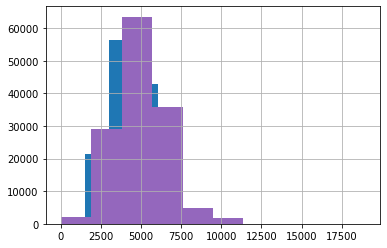

In [381]:
#df[['no_insu','total_insu','insu_employer','insu_direct','insu_medicare','insu_medicaid']].hist()
df['no_insu'].hist()  # only no insurance group looks slightly different...
df['insu_employer'].hist()
df['insu_direct'].hist()
df['insu_medicare'].hist()
df['insu_medicaid'].hist()

In [382]:
# take this as proxy for no insurance rate 
df['no_insu_rate']=df['no_insu']/df['total_pop']

In [383]:
df['unemployment1']=df['not_in_labor_force']/df['total1_labor_force']
df['unemployment2']=df['not_allocated']/df['total2_allocate']
df['unemployment3']=(df['no_work_16_19']+df['no_work_20_24']+df['no_work_25_44']+df['no_work_45_54']+
                     df['no_work_55_64']+df['no_work_65_69']+df['no_work_70'])/df['total3_work_status']

In [384]:
mask = df['n_URI_ED_visits_5yr'] > 0
df.loc[mask, 'y'] = 1
mask = df['n_URI_ED_visits_5yr'] < 1
df.loc[mask, 'y'] = 0
df['y'].value_counts()

0.00000    119469
1.00000     63325
Name: y, dtype: int64

In [385]:
cols_to_remove = ['total_pop',
                  'total_household',  # not use it in this iteration
                  'median_income',
                  'median_gross_rent',  # no info
                  'single_male_household','single_female_household','single_total_household',  
                  'male_childcare','female_childcare','total_childcare',  
                  'total_household_size',  # not use it in this iteration
                  'hs_degree','college_degree','bachelor_degree','total_degree',
                  'car1','public_trans1','public_trans_bus1','total1_trans_work',
                  'car2_along','car2_pooled','public_trans2','total2_trans_work',
                  'no_veh','total3_veh',
                  'car4_along','car4_pooled','public_trans4','total4_trans_work',
                  'trans_work_time','trans_work_num_veh',  # weird range
                  'snap1_household','total1_snap','snap2','snap3','snap4',
                  'below_100_poverty','total_poverty',
                  'no_insu','total_insu','insu_employer','insu_direct','insu_medicare','insu_medicaid',
                  'not_in_labor_force','total1_labor_force',
                  'not_allocated','total2_allocate',
                  'no_work_16_19','no_work_20_24','no_work_25_44','no_work_45_54','no_work_55_64',
                  'no_work_65_69','no_work_70','total3_work_status',
                  'adinatnumbers','n_URI_ED_visits_5yr']
df.drop(cols_to_remove, inplace = True, axis = 1)

In [388]:
df.columns

Index(['MEMBER_ID', 'adistnumbers', 'cdi_index_n', 'heindex_sqrt_n',
       'epindex_sqrt_n', 'ecindex_sqrt_n', 'gh_index_max_n', 'income_ratio',
       'single_parent_household', 'childcare', 'edu_above_hs',
       'edu_above_college', 'edu_above_bachelor', 'work_by_car1',
       'work_by_pub_trans1', 'work_by_bus1', 'work_by_car2',
       'work_by_pub_trans2', 'no_veh_n', 'work_by_car4', 'work_by_pub_trans4',
       'trans_work_time_n', 'trans_work_num_veh_n', 'snap', 'poverty100',
       'no_insu_rate', 'unemployment1', 'unemployment2', 'unemployment3', 'y'],
      dtype='object')

In [389]:
df.to_csv("uri_data_before_modeling.csv",index=False)

In [490]:
df=pd.read_csv("/home/michelle/XiaoWang/PCHP/uri_data_before_modeling.csv")

In [6]:
#df=df.iloc[:,1:]  # remove first column
df.head(5)

## data preparation for modeling

### handling NA

In [391]:
def nanSummary(dataset):
    summary={}
    
    nanS=dataset.isnull().sum().sort_values(ascending=False)
    for key in nanS.keys():
        if nanS[key] > 0:
            summary[key]=nanS[key]
            
    if summary == {}:
        summary='Data is now Clean'    
        
    return summary

In [492]:
nanSummary(df)

{'gh_index_max_n': 78267,
 'heindex_sqrt_n': 62786,
 'ecindex_sqrt_n': 62786,
 'cdi_index_n': 62780,
 'epindex_sqrt_n': 62780,
 'childcare': 45705,
 'single_parent_household': 45701,
 'poverty100': 45690,
 'work_by_pub_trans2': 45690,
 'work_by_car2': 45690,
 'trans_work_num_veh_n': 45690,
 'no_veh_n': 45690,
 'snap': 45689,
 'no_insu_rate': 45689,
 'trans_work_time_n': 45689,
 'work_by_pub_trans4': 45689,
 'work_by_car4': 45689,
 'unemployment1': 45689,
 'work_by_bus1': 45689,
 'work_by_pub_trans1': 45689,
 'unemployment3': 45689,
 'work_by_car1': 45689,
 'edu_above_bachelor': 45689,
 'edu_above_college': 45689,
 'edu_above_hs': 45689,
 'unemployment2': 45689,
 'income_ratio': 45675,
 'adistnumbers': 24342}

In [493]:
# NULLs should all come from non-Texas addresses - remove those patients for simplicity
# CDI indices have more NULLs, consider model with CDI and without CDI
#df.drop(['gh_index_max_n','heindex_sqrt_n','ecindex_sqrt_n','cdi_index_n','epindex_sqrt_n'],inplace=True,axis=1)
df = df.dropna()
df.shape  # 114249 left when not including CDI, 77976 left when including CDI

(77976, 30)

In [494]:
nanSummary(df)

'Data is now Clean'

In [495]:
#df['n_URI_ED_visits_5yr'].hist()
df['y'].value_counts()

0.00000    53433
1.00000    24543
Name: y, dtype: int64

### categorical and numerical features

In [231]:
g = df.columns.to_series().groupby(df.dtypes).groups
g

{float64: ['MEMBER_ID', 'adistnumbers', 'cdi_index_n', 'heindex_sqrt_n', 'epindex_sqrt_n', 'ecindex_sqrt_n', 'gh_index_max_n', 'income_ratio', 'single_parent_household', 'childcare', 'edu_above_hs', 'edu_above_college', 'edu_above_bachelor', 'work_by_car1', 'work_by_pub_trans1', 'work_by_bus1', 'work_by_car2', 'work_by_pub_trans2', 'work_by_car4', 'work_by_pub_trans4', 'snap', 'poverty100', 'no_insu_rate', 'unemployment1', 'unemployment2', 'unemployment3', 'y']}

In [ ]:
a = {k.name: v for k, v in g.items()}
categList = a['object']
numericList = a['float64']
print(categList)
print(numericList)
#df_num = df[[]]
#df_bin = df[[]]

### stratified shuffle split

In [496]:
fields = df.columns
itemindex = np.where(fields == "y")
newfields = np.delete(fields, itemindex)

In [497]:
from sklearn.model_selection import GroupShuffleSplit
X = np.array(df.drop('y', axis = 1))
y = np.array(df['y'])
groups = df['MEMBER_ID']
len(groups)

77976

In [498]:
sss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=None)
sss.get_n_splits(X, y)

1

In [499]:
for train_index, test_index in sss.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [500]:
X_train.shape

(54583, 29)

In [501]:
X_test.shape

(23393, 29)

In [502]:
y_train.shape

(54583,)

In [503]:
y_test.shape

(23393,)

In [504]:
X_train=pd.DataFrame(X_train,columns=newfields)
y_train=pd.DataFrame(y_train,columns=['y'])
X_test=pd.DataFrame(X_test,columns=newfields)
y_test=pd.DataFrame(y_test,columns=['y'])

In [505]:
testPatients=X_test['MEMBER_ID'].unique()
trainPatients=X_train['MEMBER_ID'].unique()
overlap_patient=[]
for patient in trainPatients:
    if patient in testPatients:
        overlap_patient.append(patient)

In [506]:
# test any patient in train set in present in test test
len(overlap_patient)

0

In [507]:
Train_df=pd.concat([X_train,y_train],axis=1)
Test_df=pd.concat([X_test,y_test],axis=1)

In [508]:
Train_df.keys()

Index(['MEMBER_ID', 'adistnumbers', 'cdi_index_n', 'heindex_sqrt_n',
       'epindex_sqrt_n', 'ecindex_sqrt_n', 'gh_index_max_n', 'income_ratio',
       'single_parent_household', 'childcare', 'edu_above_hs',
       'edu_above_college', 'edu_above_bachelor', 'work_by_car1',
       'work_by_pub_trans1', 'work_by_bus1', 'work_by_car2',
       'work_by_pub_trans2', 'no_veh_n', 'work_by_car4', 'work_by_pub_trans4',
       'trans_work_time_n', 'trans_work_num_veh_n', 'snap', 'poverty100',
       'no_insu_rate', 'unemployment1', 'unemployment2', 'unemployment3', 'y'],
      dtype='object')

In [509]:
X_train=Train_df.drop(['MEMBER_ID','y'],axis=1)
X_test=Test_df.drop(['MEMBER_ID','y'],axis=1)

In [510]:
y_train=pd.DataFrame()
y_test=pd.DataFrame()
y_train["y"]=Train_df["y"]
y_test["y"]=Test_df["y"]

In [7]:
X_train.head()

In [8]:
X_train.describe().T

In [413]:
y_train.head()

,y
0,0.00000
1,0.00000
2,1.00000
3,1.00000
4,0.00000


In [414]:
y_train['y'].ravel()

array([0., 0., 1., ..., 1., 0., 0.])

In [415]:
# save the sets without CDI indices
X_train.to_csv('Train_x_uri.csv',index=False)
y_train.to_csv('Train_y_uri.csv',index=False)
X_test.to_csv('Test_x_uri.csv',index=False)
y_test.to_csv('Test_y_uri.csv',index=False)

### standardization

In [513]:
from sklearn import preprocessing
std_scale = preprocessing.MinMaxScaler().fit(X_train)
df_std = std_scale.transform(X_train)
df_std = pd.DataFrame(df_std,columns=X_train.columns)

In [514]:
df_std_test=std_scale.transform(X_test)
df_std_test=pd.DataFrame(df_std_test,columns=X_test.columns)
X_train_std=df_std
X_test_std=df_std_test

In [515]:
X_train_std.describe().T  # all range between 0 and 1

,count,mean,std,min,25%,50%,75%,max
adistnumbers,54583.00000,0.66045,0.26044,0.00000,0.44444,0.66667,0.88889,1.00000
cdi_index_n,54583.00000,0.43812,0.16064,0.00000,0.33490,0.41651,0.53255,1.00000
heindex_sqrt_n,54583.00000,0.63839,0.13890,0.00000,0.56832,0.64326,0.71843,1.00000
epindex_sqrt_n,54583.00000,0.46525,0.16830,0.00000,0.36426,0.46449,0.56206,1.00000
ecindex_sqrt_n,54583.00000,0.28915,0.13491,0.00000,0.18612,0.26443,0.37117,1.00000
gh_index_max_n,54583.00000,0.48101,0.19728,0.00000,0.33384,0.46903,0.61305,1.00000
income_ratio,54583.00000,0.13353,0.07887,0.00000,0.08843,0.11801,0.16510,1.00000
single_parent_household,54583.00000,0.38290,0.19129,0.00000,0.24720,0.34713,0.51277,1.00000
childcare,54583.00000,0.15274,0.11406,0.00000,0.06783,0.13498,0.21491,1.00000
edu_above_hs,54583.00000,0.53318,0.15913,0.00000,0.44995,0.54084,0.63054,1.00000


### imbalance

In [516]:
class_counts=y_train['y'].value_counts()
train_imbratio=class_counts[1]/class_counts[0]  #len(y_train)
train_imbratio

0.45737324112888156

In [517]:
class_counts

0.00000    37453
1.00000    17130
Name: y, dtype: int64

In [518]:
class_counts=y_test['y'].value_counts()
train_imbratio=class_counts[1]/class_counts[0]
train_imbratio

0.463892365456821

new - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
    
old - http://glemaitre.github.io/imbalanced-learn/generated/imblearn.over_sampling.SMOTE.html   

In [519]:
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=40, k_neighbors=3, n_jobs=1)

In [520]:
X_train_res, y_train_res = sm.fit_resample(X_train_std, y_train['y'].ravel())

## correlation

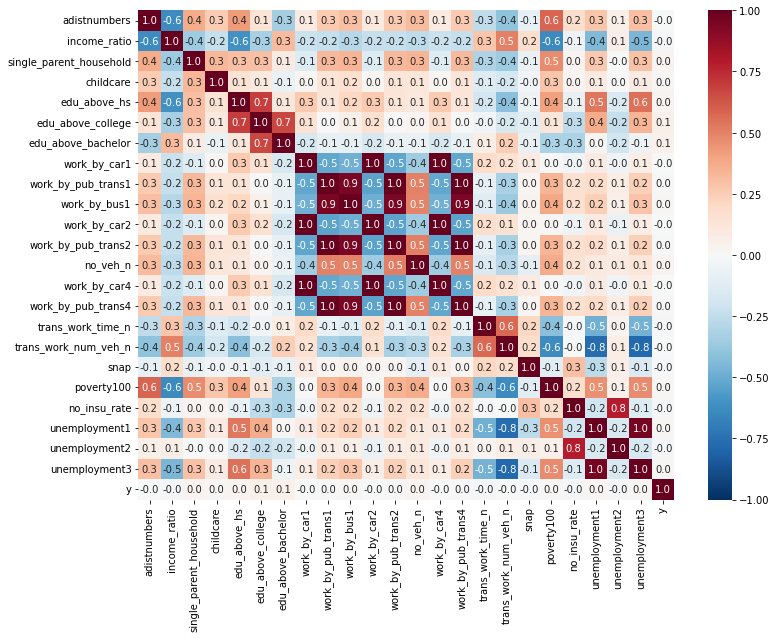

In [424]:
# without CDI
plt.figure(figsize=(12, 9))
sns.heatmap(df.drop('MEMBER_ID',inplace=False,axis = 1).corr(), annot=True, fmt = '.1f', 
            cmap="RdBu_r", vmin=-1, vmax=1)
plt.show()

- edu_above_hs ~ edu_above_college, only keep one
- work_by_car1 == work_by_car2 == work_by_car4, only keep one
- work_by_pub_trans1 == work_by_pub_trans_2 == work_by_pub_trans_4 ~ work_by_bus1, only keep one
- unemployment1 == unemployment3, only keep one, but unemployment2 is in different direction

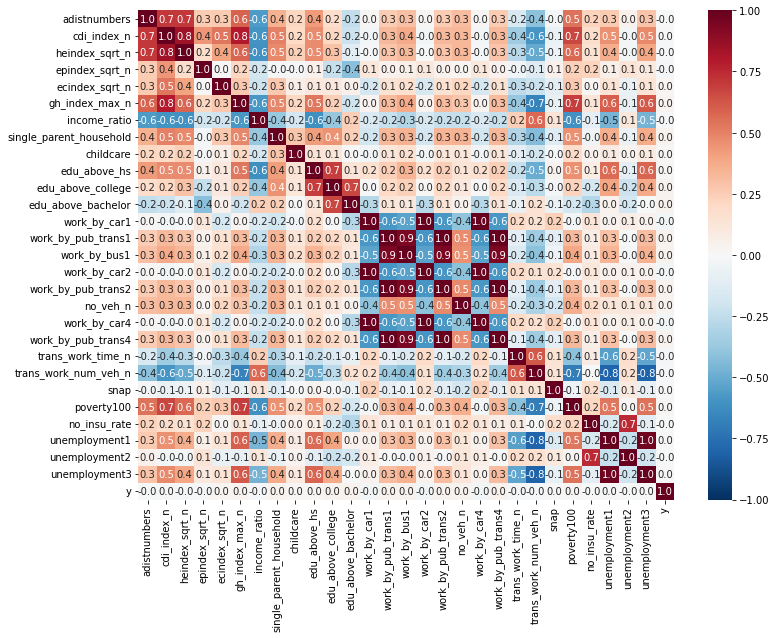

In [521]:
# with CDI
plt.figure(figsize=(12, 9))
sns.heatmap(df.drop('MEMBER_ID',inplace=False,axis = 1).corr(), annot=True, fmt = '.1f', 
            cmap="RdBu_r", vmin=-1, vmax=1)
plt.show()

CDI index is highly correlated with ADI, HE_index, GH_index, poverty. <br>
HE_index is highly correlated with ADI. <br>
GH_index is highly correlated with ADI, income ratio, trans_work_num_veh_n, poverty, unemployment1 & 3.

In [ ]:
#f = plt.figure(figsize=(19, 15))
#plt.matshow(df.corr(),fignum=f.number)
#plt.show()

In [425]:
df['y'].corr(df['income_ratio'])

-0.01818525009846892

In [426]:
df['y'].corr(df['single_parent_household'])

0.031014763043658456

In [522]:
df['y'].corr(df['cdi_index_n'])

0.006970623061642525

In [523]:
df['y'].corr(df['heindex_sqrt_n'])

-0.008938538146202

## modeling

In [429]:
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
from statistics import mode
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import roc_curve,auc,confusion_matrix,accuracy_score,classification_report 
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.datasets import make_classification
from operator import itemgetter
#Advanced optimization
from scipy import optimize as op
import itertools

### model training - logistic regression L1

https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

manually remove duplicated and highly correlated + similar meaning features: 
cor(trans_work_num_veh_n, unemployment3) = -0.8, but we keep both

In [430]:
X_train_res.keys()

Index(['adistnumbers', 'income_ratio', 'single_parent_household', 'childcare',
       'edu_above_hs', 'edu_above_college', 'edu_above_bachelor',
       'work_by_car1', 'work_by_pub_trans1', 'work_by_bus1', 'work_by_car2',
       'work_by_pub_trans2', 'no_veh_n', 'work_by_car4', 'work_by_pub_trans4',
       'trans_work_time_n', 'trans_work_num_veh_n', 'snap', 'poverty100',
       'no_insu_rate', 'unemployment1', 'unemployment2', 'unemployment3'],
      dtype='object')

In [462]:
lr= LogisticRegression(C=1,max_iter=10000,solver='liblinear',penalty='l1',  # 'lbfgs' does not support l1 penalty
                       class_weight='balanced')

In [488]:
col_drop = ['edu_above_college','work_by_car2','work_by_car4',
            'work_by_bus1','work_by_pub_trans2','work_by_pub_trans4','unemployment3']

Index(['adistnumbers', 'income_ratio', 'single_parent_household', 'childcare',
       'edu_above_hs', 'edu_above_bachelor', 'work_by_car1',
       'work_by_pub_trans1', 'no_veh_n', 'trans_work_time_n',
       'trans_work_num_veh_n', 'snap', 'poverty100', 'no_insu_rate',
       'unemployment1', 'unemployment2'],
      dtype='object')

In [463]:
lr.fit(X_train_res.drop(col_drop,inplace=False,axis=1),y_train_res)

LogisticRegression(C=1, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')

In [464]:
y_pred = lr.predict(X_test_std.drop(col_drop,inplace=False,axis=1))

In [465]:
np.array(np.unique(y_pred, return_counts=True)).T

array([[0.0000e+00, 1.7315e+04],
       [1.0000e+00, 1.6960e+04]])

In [466]:
# save model - pickle is the standard way of serializing objects in python
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle
pickle.dump(lr, open("lr.sav", 'wb'))

In [457]:
# load model
lr=pickle.load(open("lr.sav", 'rb'))

### L1 model - more parsimonious
manually remove more correlated features based on feature importance ranking of lr model

In [477]:
lr1= LogisticRegression(C=1,max_iter=10000,solver='liblinear',penalty='l1',  # 'lbfgs' does not support l1 penalty
                        class_weight='balanced') 

In [ ]:
col_drop1=['edu_above_bachelor','edu_above_college','work_by_car1','work_by_car2','work_by_car4',
           'work_by_pub_trans1','work_by_bus1','work_by_pub_trans2','work_by_pub_trans4',
           'trans_work_num_veh_n','unemployment2','unemployment3']

In [478]:
lr1.fit(X_train_res.drop(col_drop1,inplace=False,axis=1),y_train_res)

LogisticRegression(C=1, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')

In [479]:
y_pred1 = lr1.predict(X_test_std.drop(col_drop1,inplace=False,axis=1))

In [480]:
np.array(np.unique(y_pred1, return_counts=True)).T

array([[0.0000e+00, 1.8415e+04],
       [1.0000e+00, 1.5860e+04]])

In [487]:
pickle.dump(lr1, open("lr1.sav", 'wb'))

In [ ]:
lr1=pickle.load(open("lr1.sav", 'rb'))

### L1 model - CDI added
add 5 CDI indices, keep less SDOH features

In [525]:
lr2= LogisticRegression(C=1,max_iter=10000,solver='liblinear',penalty='l1',
                        class_weight='balanced')  

In [526]:
col_drop2=['edu_above_bachelor','edu_above_college','work_by_car1','work_by_car2','work_by_car4',
           'work_by_pub_trans1','work_by_bus1','work_by_pub_trans2','work_by_pub_trans4',
           'trans_work_num_veh_n','unemployment2','unemployment3']  # same as col_drop1

In [527]:
lr2.fit(X_train_res.drop(col_drop2,inplace=False,axis=1),y_train_res)

LogisticRegression(C=1, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')

In [528]:
y_pred2 = lr2.predict(X_test_std.drop(col_drop2,inplace=False,axis=1))

In [529]:
np.array(np.unique(y_pred2, return_counts=True)).T

array([[0.0000e+00, 1.3032e+04],
       [1.0000e+00, 1.0361e+04]])

In [ ]:
pickle.dump(lr2, open("lr2.sav", 'wb'))

In [ ]:
lr2=pickle.load(open("lr2.sav", 'rb'))

### grid search CV

In [685]:
def hyperParamSummary(grid_scores, n_top):
    BestScores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(BestScores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [686]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] , 'penalty': ['l1']}
clf = GridSearchCV(lr,param_grid=param_grid)

In [144]:
clf.fit(X_train_res,y_train_res.values.ravel())

In [636]:
hyperParamSummary(clf.cv_results_,5)

In [ ]:
lr_grid=LogisticRegression(C=10,penalty='l1')
lr_grid.fit(X_train_res,y_train_res)

### model performance

In [467]:
print(accuracy_score(y_test, y_pred))

0.532837345003647


In [481]:
print(accuracy_score(y_test, y_pred1))

0.5342377826404084


In [530]:
print(accuracy_score(y_test, y_pred2))

0.5523447185055358


In [468]:
print(confusion_matrix(y_test, y_pred))

[[12051 10748]
 [ 5264  6212]]


In [482]:
print(confusion_matrix(y_test, y_pred1))

[[12625 10174]
 [ 5790  5686]]


In [531]:
print(confusion_matrix(y_test, y_pred2))

[[9270 6710]
 [3762 3651]]


In [469]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.53      0.60     22799
         1.0       0.37      0.54      0.44     11476

    accuracy                           0.53     34275
   macro avg       0.53      0.53      0.52     34275
weighted avg       0.59      0.53      0.55     34275



In [483]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.69      0.55      0.61     22799
         1.0       0.36      0.50      0.42     11476

    accuracy                           0.53     34275
   macro avg       0.52      0.52      0.51     34275
weighted avg       0.58      0.53      0.55     34275



In [532]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.71      0.58      0.64     15980
         1.0       0.35      0.49      0.41      7413

    accuracy                           0.55     23393
   macro avg       0.53      0.54      0.52     23393
weighted avg       0.60      0.55      0.57     23393



In [105]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('RdYlGn')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",fontsize=18,
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",fontsize=18,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=14)
    plt.xlabel('Predicted label\naccuracy={:0.4f} \n misclass={:0.4f}'.format(accuracy, misclass),fontsize=16)
    plt.show()

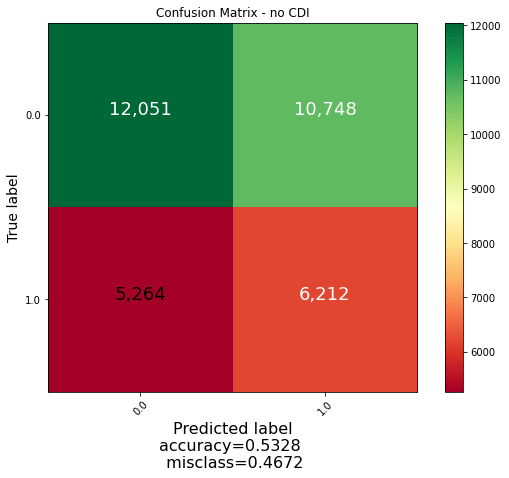

In [470]:
plot_confusion_matrix(cm           = np.array(confusion_matrix(y_test, y_pred)), 
                      normalize    = False,
                      target_names = ['0.0', '1.0'],
                      title        = "Confusion Matrix - no CDI")

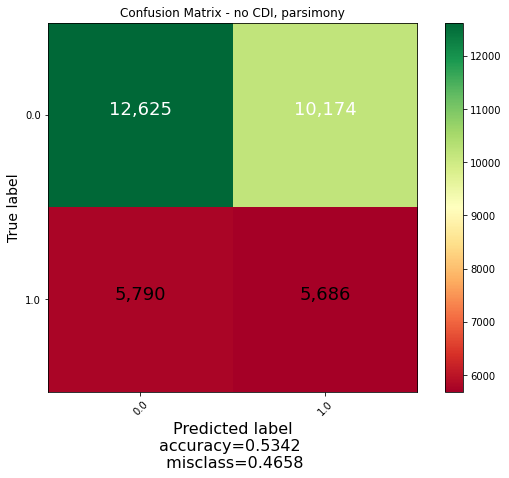

In [484]:
plot_confusion_matrix(cm           = np.array(confusion_matrix(y_test, y_pred1)), 
                      normalize    = False,
                      target_names = ['0.0', '1.0'],
                      title        = "Confusion Matrix - no CDI, parsimony")

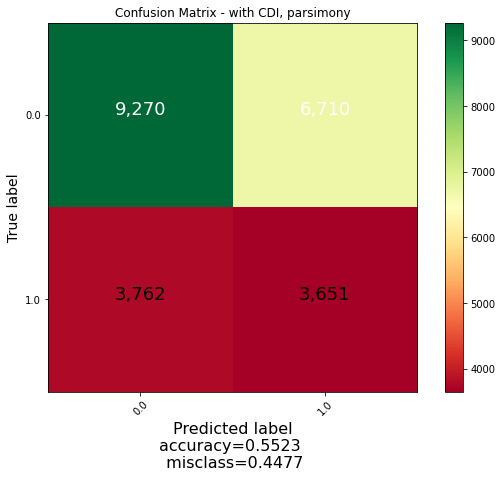

In [533]:
plot_confusion_matrix(cm           = np.array(confusion_matrix(y_test, y_pred2)), 
                      normalize    = False,
                      target_names = ['0.0', '1.0'],
                      title        = "Confusion Matrix - with CDI, parsimony")

### feature importance

In [471]:
print(lr.coef_)

[[-0.10649826 -1.08050934  0.12028357  0.14448303 -0.15192859  0.71859322
   0.23566042 -0.05385758  0.48128752 -0.26622877  0.09487736 -0.00863412
   0.          0.1291987   0.03265685 -0.25698063]]


In [472]:
coeff_df = pd.DataFrame(data=np.transpose(lr.coef_),columns=['Coeff'])

In [475]:
coeff_df['Features']=X_test.drop(col_drop,inplace=False,axis=1).columns
coeff_df['positive']=coeff_df['Coeff'] > 0
coeff_df=coeff_df.sort_values('Coeff',ascending=False)
#coeff_df

In [474]:
coeff_df_imp=coeff_df
coeff_df_imp=coeff_df_imp.sort_values('Coeff',ascending=True)
coeff_df_imp

,Coeff,Features,positive
1,-1.08051,income_ratio,False
9,-0.26623,trans_work_time_n,False
15,-0.25698,unemployment2,False
4,-0.15193,edu_above_hs,False
0,-0.10650,adistnumbers,False
7,-0.05386,work_by_pub_trans1,False
11,-0.00863,snap,False
12,0.00000,poverty100,False
14,0.03266,unemployment1,True
10,0.09488,trans_work_num_veh_n,True


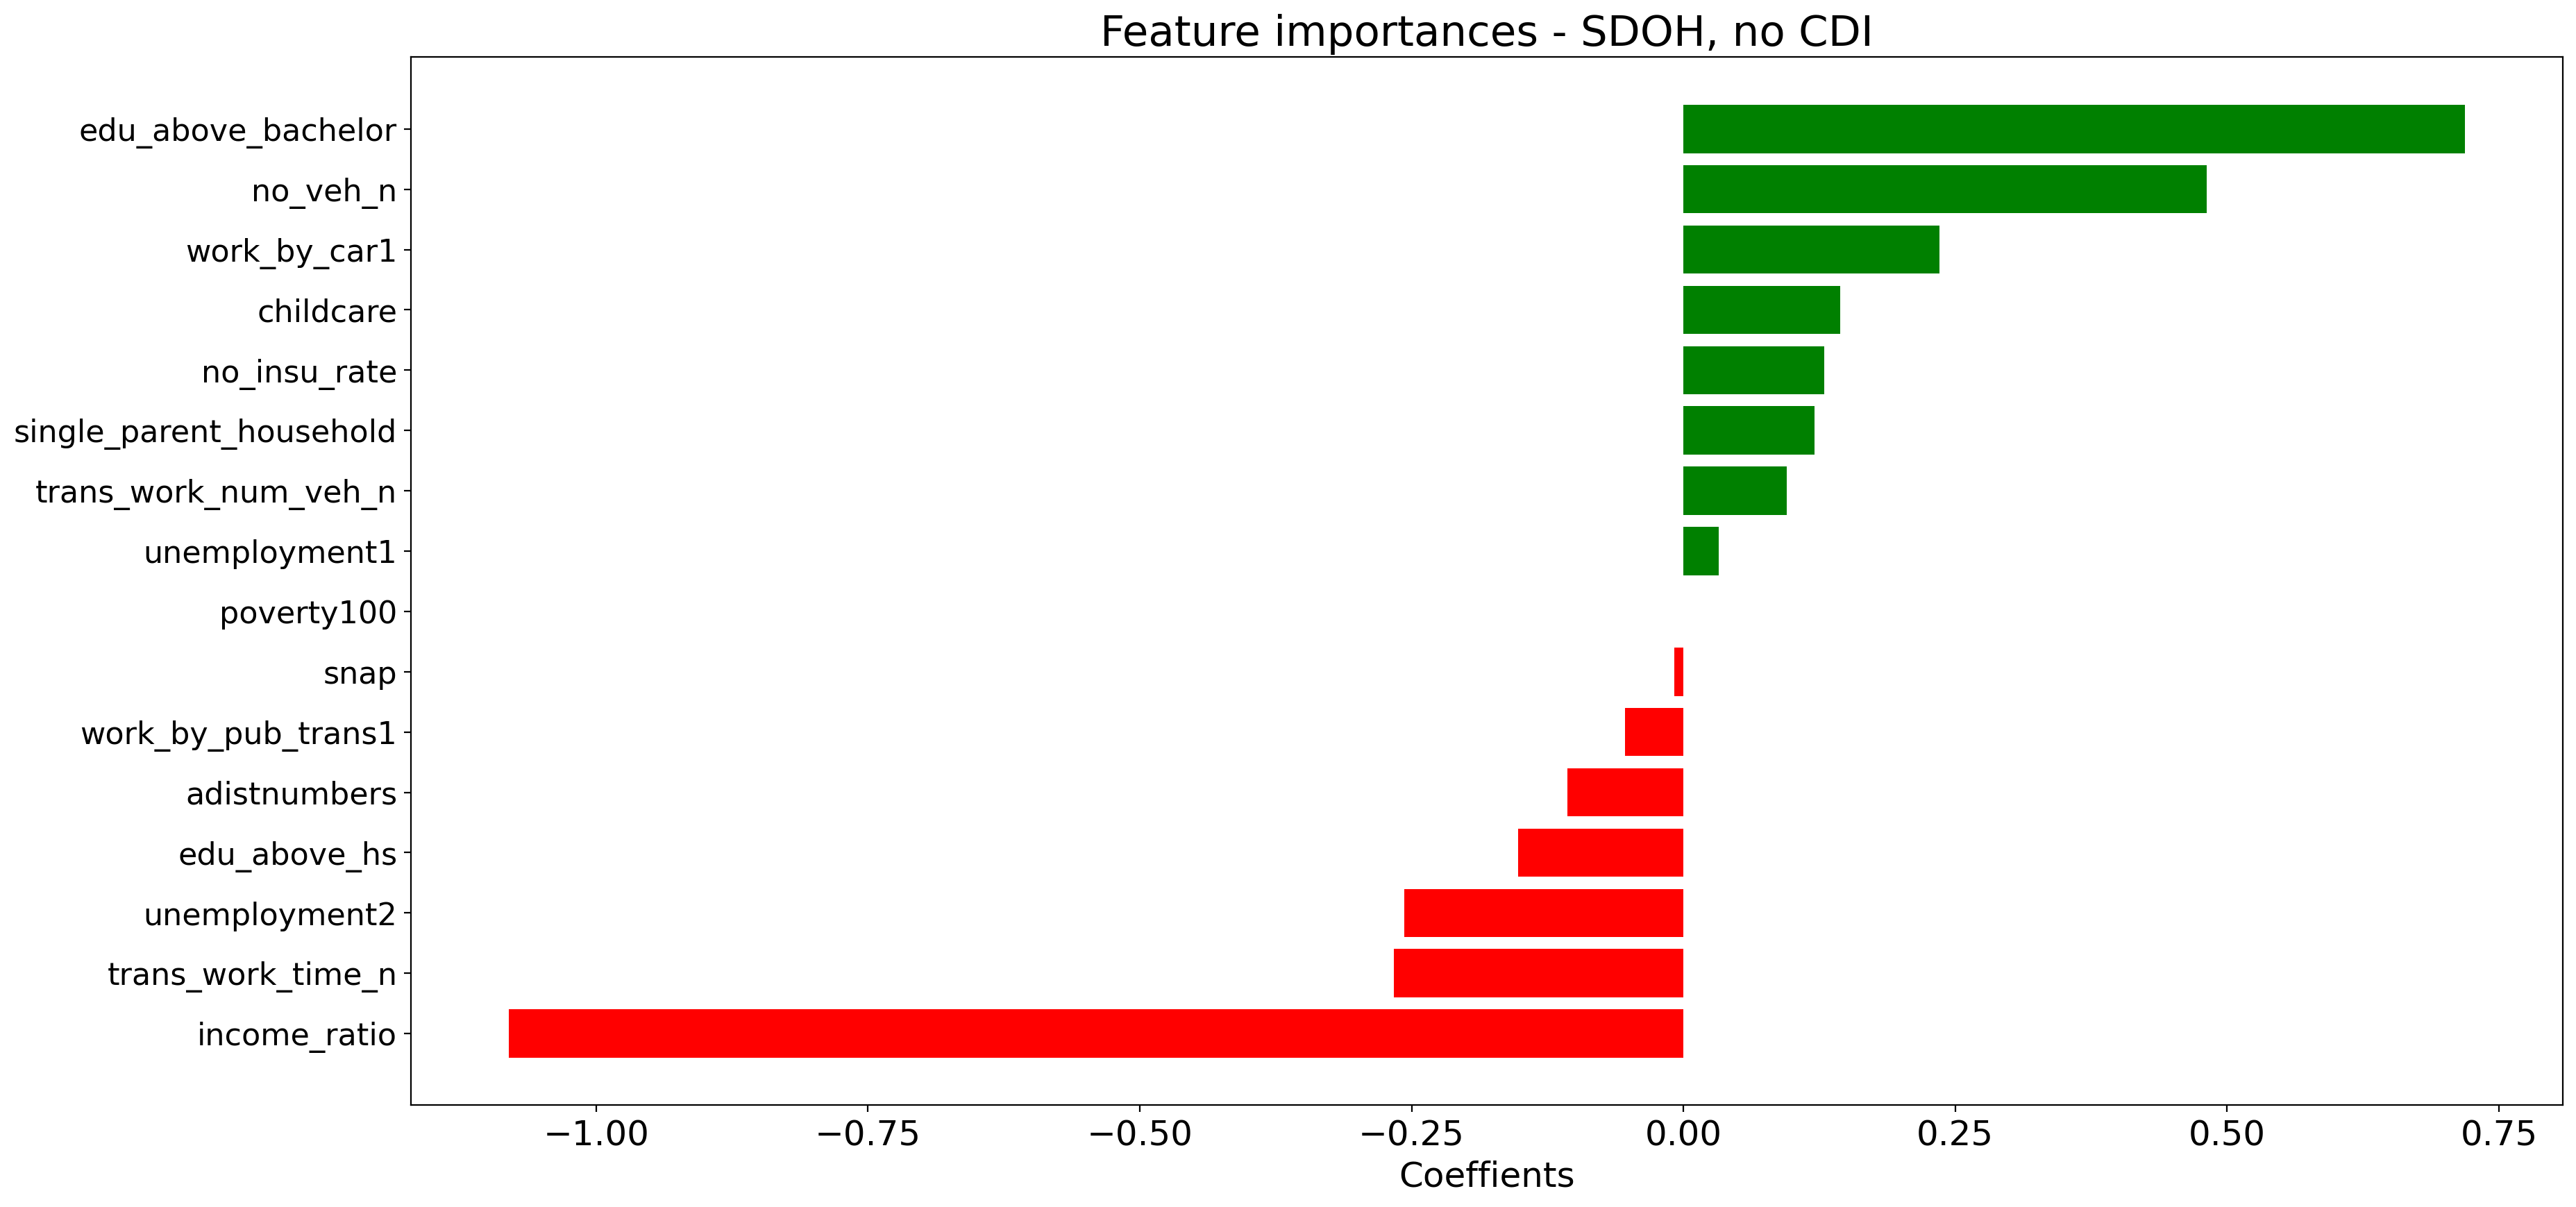

In [476]:
Features=coeff_df_imp.Features
Importances=coeff_df_imp.Coeff
# Plot the feature importance
plt.figure(num=None, figsize=(20, 10), dpi=200, facecolor='w', edgecolor='k')
plt.title("Feature importances - SDOH, no CDI",fontsize=22)
plt.barh(range(coeff_df_imp.shape[0]),
         Importances,color=coeff_df_imp.positive.map({True: 'g', False: 'r'}),
         align="center")
plt.yticks(range(coeff_df_imp.shape[0]), Features, fontsize=16)
plt.xticks(fontsize=18)
plt.xlabel('Coeffients',fontsize=18)
plt.show()

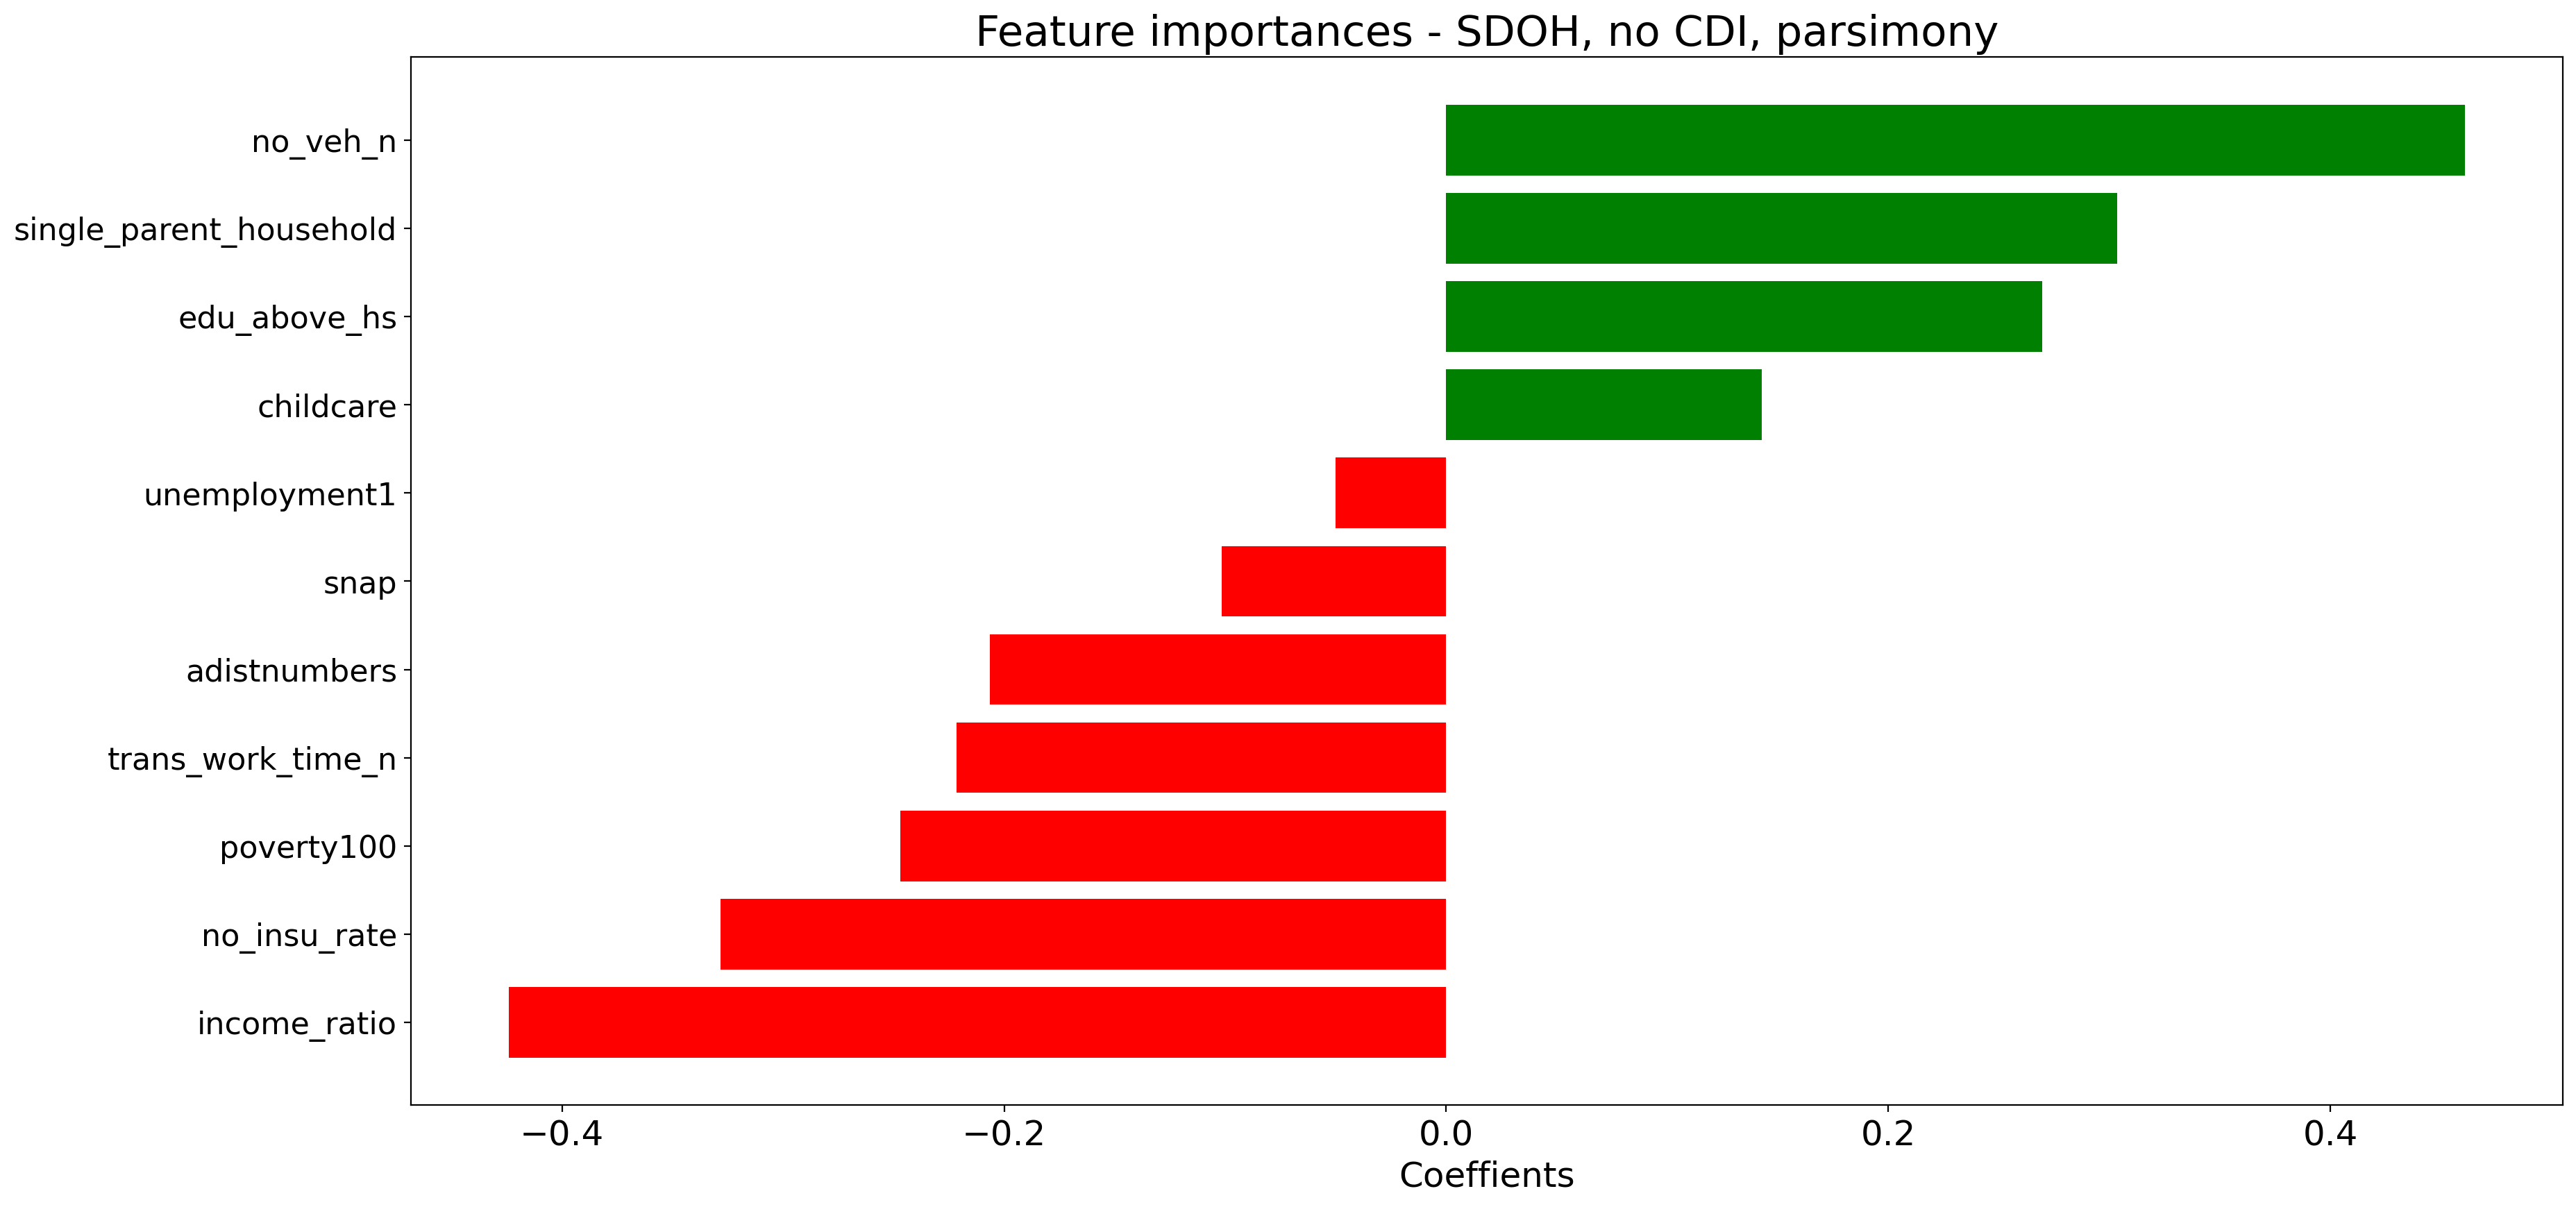

In [489]:
coeff_df1 = pd.DataFrame(data=np.transpose(lr1.coef_),columns=['Coeff'])
coeff_df1['Features']=X_test.drop([col_drop1],inplace=False,axis=1).columns
coeff_df1['positive']=coeff_df1['Coeff'] > 0
coeff_df1=coeff_df1.sort_values('Coeff',ascending=False)

coeff_df_imp1=coeff_df1
coeff_df_imp1=coeff_df_imp1.sort_values('Coeff',ascending=True)

Features1=coeff_df_imp1.Features
Importances1=coeff_df_imp1.Coeff
# Plot the feature importance
plt.figure(num=None, figsize=(20, 10), dpi=200, facecolor='w', edgecolor='k')
plt.title("Feature importances - SDOH, no CDI, parsimony",fontsize=22)
plt.barh(range(coeff_df_imp1.shape[0]),
         Importances1,color=coeff_df_imp1.positive.map({True: 'g', False: 'r'}),
         align="center")
plt.yticks(range(coeff_df_imp1.shape[0]), Features1, fontsize=16)
plt.xticks(fontsize=18)
plt.xlabel('Coeffients',fontsize=18)
plt.show()

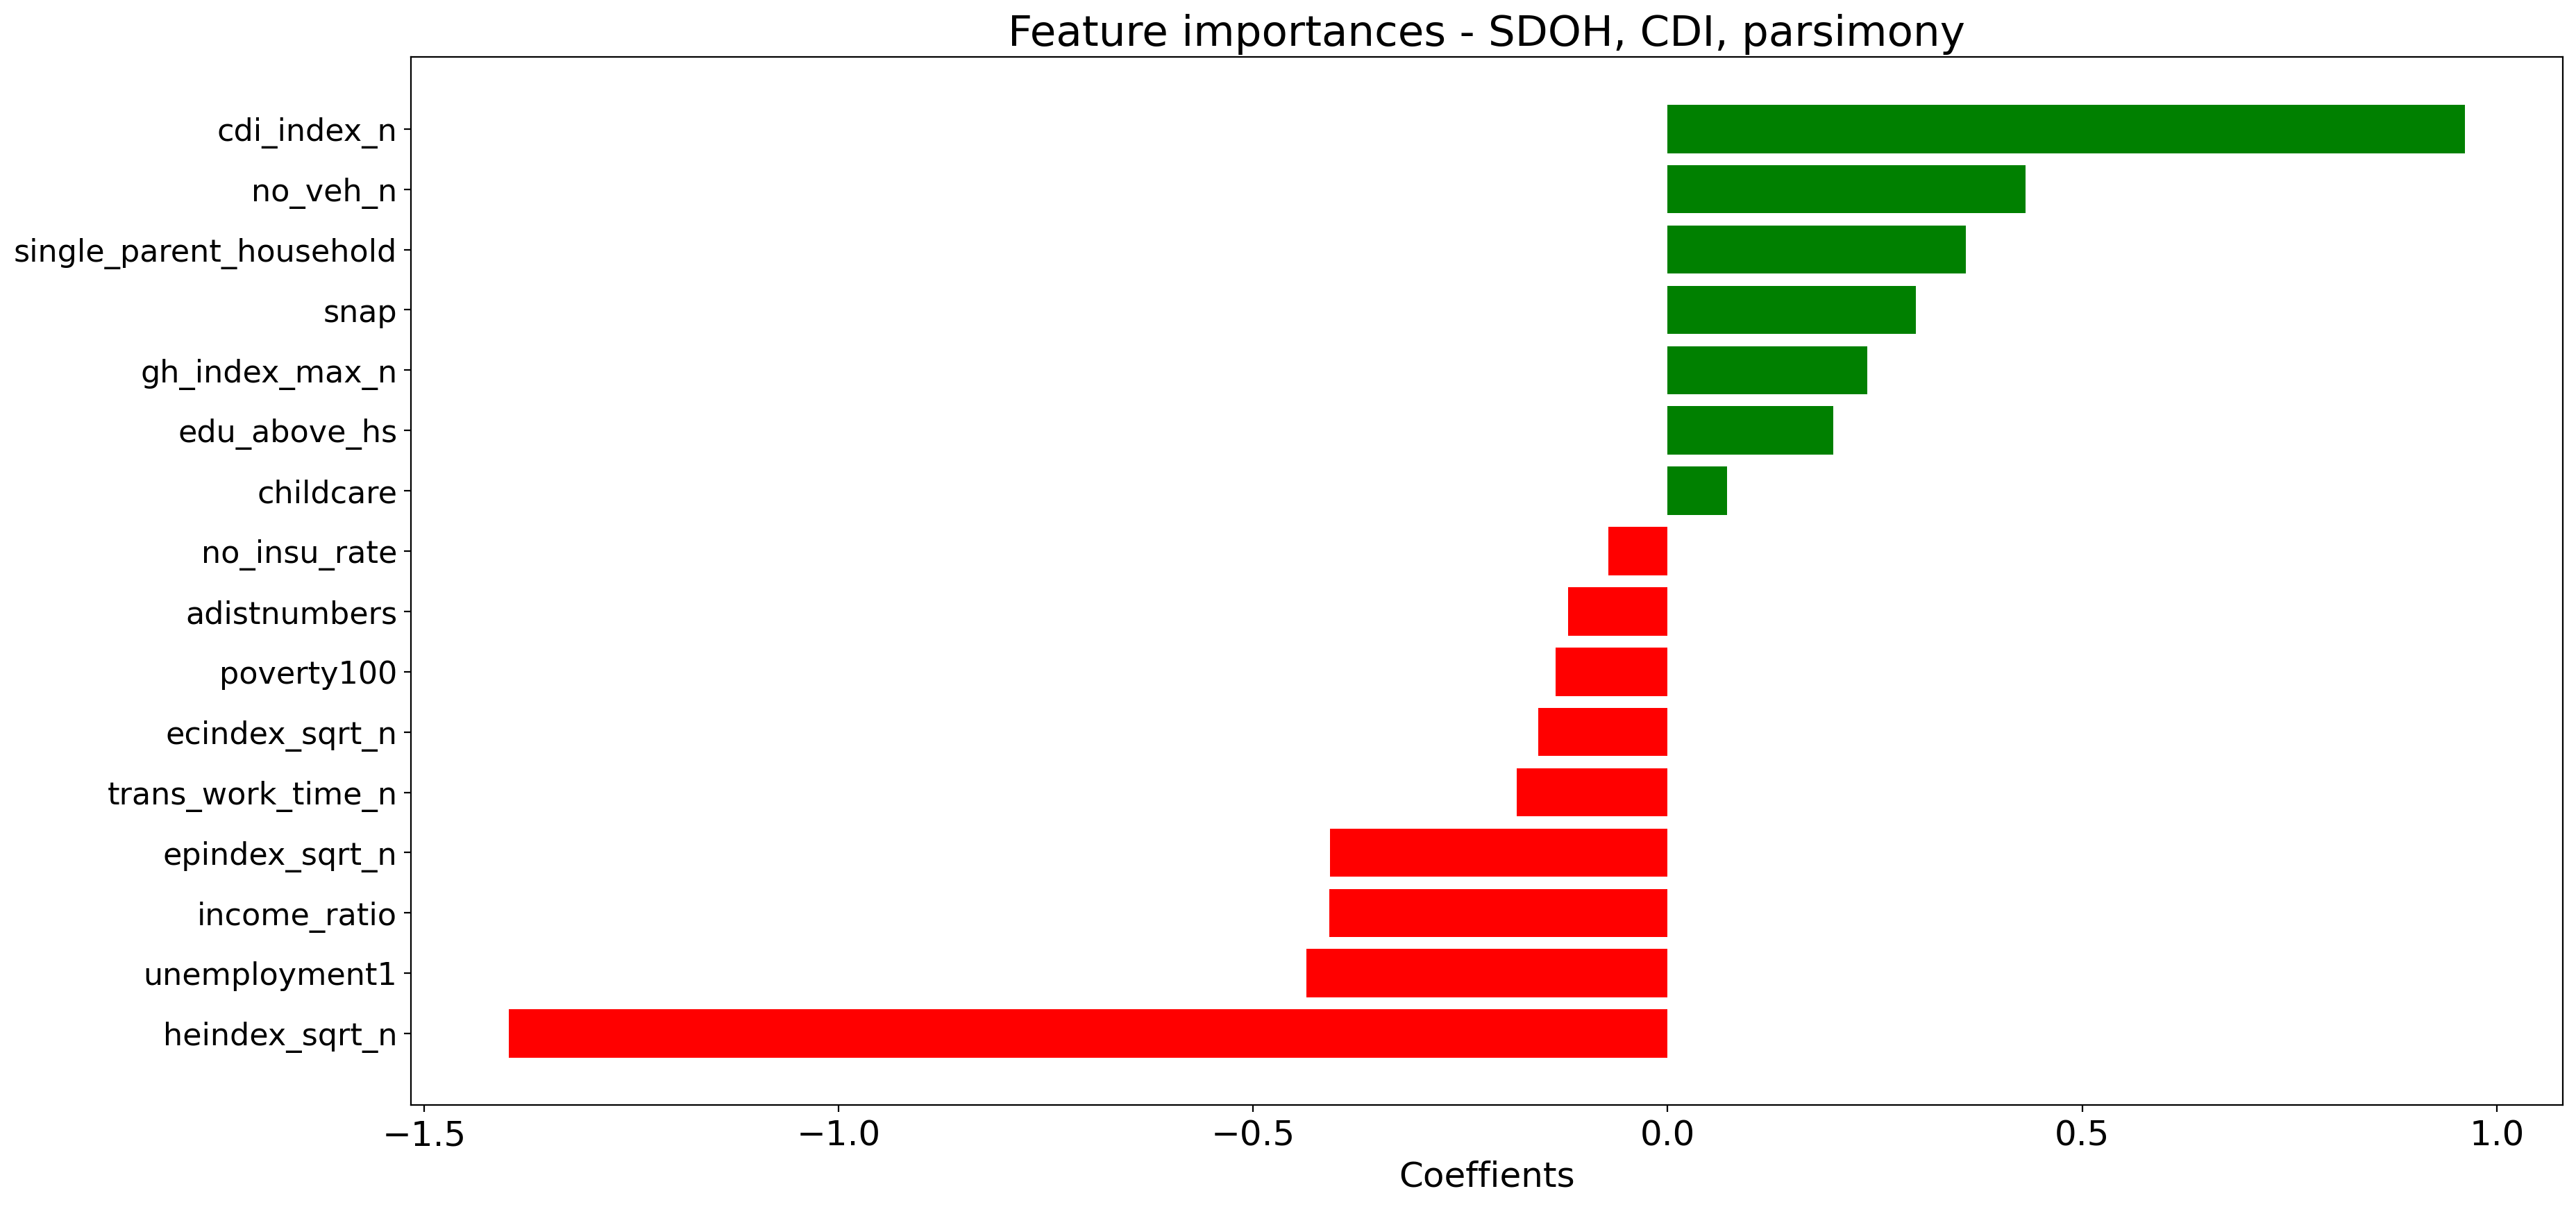

In [534]:
coeff_df2 = pd.DataFrame(data=np.transpose(lr2.coef_),columns=['Coeff'])
coeff_df2['Features']=X_test.drop(col_drop2,inplace=False,axis=1).columns
coeff_df2['positive']=coeff_df2['Coeff'] > 0
coeff_df2=coeff_df2.sort_values('Coeff',ascending=False)

coeff_df_imp2=coeff_df2
coeff_df_imp2=coeff_df_imp2.sort_values('Coeff',ascending=True)

Features2=coeff_df_imp2.Features
Importances2=coeff_df_imp2.Coeff
# Plot the feature importance
plt.figure(num=None, figsize=(20, 10), dpi=200, facecolor='w', edgecolor='k')
plt.title("Feature importances - SDOH, CDI, parsimony",fontsize=22)
plt.barh(range(coeff_df_imp2.shape[0]),
         Importances2,color=coeff_df_imp2.positive.map({True: 'g', False: 'r'}),
         align="center")
plt.yticks(range(coeff_df_imp2.shape[0]), Features2, fontsize=16)
plt.xticks(fontsize=18)
plt.xlabel('Coeffients',fontsize=18)
plt.show()

## recursive feature elimination (RFE)

In [667]:
df.keys()

Index(['MEMBER_ID', 'adistnumbers', 'income_ratio', 'single_parent_household',
       'childcare', 'edu_above_hs', 'edu_above_college', 'edu_above_bachelor',
       'work_by_car1', 'work_by_pub_trans1', 'work_by_bus1', 'work_by_car2',
       'work_by_pub_trans2', 'work_by_car4', 'work_by_pub_trans4', 'snap',
       'poverty100', 'no_insu_rate', 'unemployment1', 'unemployment2',
       'unemployment3', 'y'],
      dtype='object')

In [675]:
data_final_vars=df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# estimator=RandomForestRegressor()
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe = rfe.fit(X_train_res, y_train_res)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True  True  True False False  True False
  True False False False False  True  True  True]
[11  1  3  6  1  1  1  1  9  5  1  8  1  7  4 10  2  1  1  1]


In [684]:
X_train_res.loc[:,rfe.support_].columns

Index(['income_ratio', 'edu_above_hs', 'edu_above_college',
       'edu_above_bachelor', 'work_by_car1', 'work_by_car2', 'work_by_car4',
       'unemployment1', 'unemployment2', 'unemployment3'],
      dtype='object')